# Exercise 7

Group Members: Luis Pazos Clemens, Robert Freund, Eugen Dizer

Deadline: 12.02.2021, 16:00.

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.sparse
from scipy.spatial import distance

## 3. Kernelized (Ridge) Regression

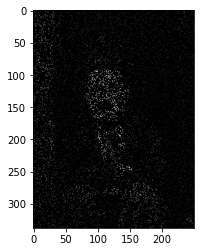

In [2]:
# Import grayscale image:

im = plt.imread('data/cc_90.png')
im_dim = np.shape(im)

px, py = np.mgrid[0:im_dim[0], 0:im_dim[1]]
pcoord = np.c_[px.ravel(), py.ravel()]      # these pixel coordinates are our FEATURES X

gy_values = im[pcoord[:,0], pcoord[:,1]]    # these pixel gray values are our RESPONSES Y

plt.imshow(gy_values.reshape((338, 250)), cmap='gray')  # quick CHECK
plt.show()

In [3]:
# Define squared exponential kernel function:
def kernel_func(x1,x2,sigma):
    
    dim1, dim2 = np.shape(x1)[0], np.shape(x2)[0]          
    sp_k_mat = scipy.sparse.csc_matrix((dim1, dim2))  # create sparse matrix
    
    icol = np.arange(dim2)
    
    for i in range(dim1):      # loop along one dimension

        euc = distance.cdist(np.atleast_2d(x1[i]), x2, 'euclidean')
        euc[euc > 50] = 0     #set to 0 if Euclidean distance is too large
        K = np.squeeze(np.exp( -euc /(2*(sigma**2)) ))
        
        icol = np.squeeze(icol[K!=0])
        sp_k_mat[i, icol] = K[K!=0]
              
    return sp_k_mat

In [4]:
 def alpha(x1,x2,sigma,tau,Y):   #compute weight vector only once but leave sigma and tau free to play with
    
    Gmat = kernel_func(x1,x2,sigma)
    Gmat.flat[::Gmat.shape[1]+1] += tau
    a = scipy.sparse.linalg.spsolve(Gmat, Y)
    
    return  a

In [5]:
# Compute the new regressed values:
def regressed_y(x1,x2,sigma,tau,Y):
    
    Ks = kernel_func(x1,x2,sigma)
    a = alpha(x2,x2,sigma,tau,Y)
    ynew = a.Ks
    
    return ynew

In [6]:
Xzeros = pcoord[gy_values==0]  # image coordinates where gray values = 0
Xnonzero = pcoord[gy_values!=0]
Y = gy_values[gy_values!=0]

def new_image(x1,x2,sigma,tau,Y): 
    new_im = im[Xzeros[:,0], Xzeros[:1]] = regressed_y(x1,x2,sigma,tau,Y)
    return new_im

sigmas = np.arange(1,10,2)
taus = np.arange(0.1,1,0.2)

#Plot the generated iamges:
fig=plt.figure(figsize=(10, 10))
axes=[]
for i in range(len(sigmas)):
    img = new_image(Xzeros, Xnonzero, sigmas[i], taus[i], Y)
    axes.append( fig.add_subplot(2, 4, i+1) )
    plt.imshow(img, interpolation ="nearest")
    axes.append( fig.add_subplot(2, 4, i+5) )
    plt.imshow(img, interpolation ="bicubic")
fig.tight_layout()    
plt.show()

C:\Users\Eugen\anaconda3\lib\site-packages\scipy\sparse\_index.py:124: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>